https://github.com/ibm-watson-data-lab/pixiedust/wiki/Tutorial:-Using-Notebooks-with-PixieDust-for-Fast,-Flexible,-and-Easier-Data-Analysis-and-Experimentation

In [13]:
#!pip install --user -U pixiedust requests matplotlib
import pixiedust

inspections = pixiedust.sampleData("https://opendata.lasvegasnevada.gov/resource/86jg-3buh.csv")

Downloaded 363833 bytes
Creating pandas DataFrame for 'https://opendata.lasvegasnevada.gov/resource/86jg-3buh.csv'. Please wait...
Loading file using 'pandas'
Successfully created pandas DataFrame for 'https://opendata.lasvegasnevada.gov/resource/86jg-3buh.csv'


In [14]:
display(inspections)

:@computed_region_tnyv_z3b7,address,category_name,city,current_demerits,current_grade,date_current,employee_id,inspection_date,inspection_demerits,inspection_grade,inspection_result,inspection_time,inspection_type,location_1,location_1_address,location_1_city,location_1_state,location_1_zip,location_name,permit_number,permit_status,record_updated,restaurant_name,serial_number,state,violations,zip
nan,2210 S Las Vegas Blvd,Restaurant,Las Vegas,8,A,2017-08-07T00:00:00.000,EE7001291,2017-08-07T00:00:00.000,8,A,'A' Grade,2017-08-07T11:10:00.000,Routine Inspection,POINT (115.156503 36.145702),nan,nan,nan,nan,INTERNATIONAL HOUSE OF PANCAKES,PR0005939,A,2017-08-07T13:50:43.000,IHOP,DA9WNCYBT,Nevada,"202,2929,2930,2955",89104-2527
nan,3949 S Maryland Pkwy,Restaurant,Las Vegas,0,A,2017-08-23T00:00:00.000,EE7001228,2017-04-10T00:00:00.000,16,B,'B' Downgrade,2017-04-10T18:00:00.000,Routine Inspection,POINT (115.1378683 36.11573),nan,nan,nan,nan,SAKANA,PR0009339,B,2017-04-10T19:15:24.000,SAKANA SUSHI BAR,DAP8C0CGB,Nevada,"204,217,2912,2954,2956",89119-7547
nan,2685 S Eastern Ave 400,Restaurant,Las Vegas,0,A,2017-11-17T00:00:00.000,EE7001208,2017-08-07T00:00:00.000,16,B,'B' Downgrade,2017-08-07T10:40:00.000,Routine Inspection,POINT (115.119269 36.141164),nan,nan,nan,nan,Roberto's Taco Shop,PR0020185,B,2017-08-07T11:56:12.000,Roberto's Taco Shop,DABXQFQ4W,Nevada,"202,208,211,2930,2955",89169-1889
nan,3960 S Las Vegas Blvd,Bar / Tavern,Las Vegas,0,A,2017-08-15T00:00:00.000,EE7001245,2017-08-08T00:00:00.000,15,B,'B' Downgrade,2017-08-08T15:00:00.000,Routine Inspection,POINT (115.1737761 36.0909158),nan,nan,nan,nan,FOUR SEASONS HOTEL,PR0009041,B,2017-08-08T16:09:21.000,FOUR SEASONS POOL BAR,DAS664VDV,Nevada,"211,212,215,2908,2928,2930,2955",89119-1046
nan,9400 S EASTERN 106B,Restaurant,Las Vegas,0,A,2017-08-15T00:00:00.000,EE7000804,2017-08-08T00:00:00.000,17,B,'B' Downgrade,2017-08-08T11:00:00.000,Routine Inspection,POINT (115.1179256 36.0182263),nan,nan,nan,nan,BUDDHA THAI BISTRO,PR0014787,B,2017-08-08T14:26:04.000,BUDDHA THAI BISTRO,DAYAAAMBY,Nevada,"202,211,216,2928,2929,2930,2955,2956",89123
nan,1370 W CHEYENNE Ave,Caterer,North Las Vegas,0,A,2017-08-11T00:00:00.000,EE7001185,2017-08-11T00:00:00.000,0,A,'A' Grade,2017-08-11T14:15:00.000,Routine Inspection,POINT (115.1596644 36.2180083),nan,nan,nan,nan,WHITMORES OF VEGAS,PR0124453,A,2017-08-14T08:36:38.000,WHITMORES OF VEGAS CATERING,DA1801199,Nevada,2911,89030
nan,2428 E CHEYENNE Ave,Snack Bar,North Las Vegas,3,A,2018-01-04T00:00:00.000,EE7000620,2017-08-14T00:00:00.000,0,A,'A' Grade,2017-08-14T14:15:00.000,Routine Inspection,POINT (115.1175808 36.2179984),nan,nan,nan,nan,DOTTY'S #111,PR0112865,A,2017-08-14T15:03:59.000,DOTTY'S #111 - SNACK BAR,DAPDOJHRG,Nevada,nan,89030
nan,2225 VILLAGE WALK,Bar / Tavern,Henderson,9,A,2017-08-09T00:00:00.000,EE7001296,2017-08-09T00:00:00.000,9,A,'A' Grade,2017-08-09T14:45:00.000,Routine Inspection,POINT (115.0849203 36.022438),nan,nan,nan,nan,BELLA VITA,PR0113856,A,2017-08-09T16:07:21.000,BELLA VITA BAR,DAMDOKVO3,Nevada,"215,2930,2955,2956",89052
nan,1301 W Sunset Rd,Restaurant,Henderson,3,A,2017-08-16T00:00:00.000,EE7000851,2017-04-18T00:00:00.000,8,A,'A' Grade,2017-04-18T13:00:00.000,Routine Inspection,POINT (115.0414723 36.0612766),nan,nan,nan,nan,Sunset Station - Subway #50329,PR0022018,A,2017-04-18T14:12:10.000,Subway #50329,DASZ0EPLI,Nevada,204,89014-6607
nan,1 S Main St,Portable Unit,Las Vegas,0,A,2017-08-09T00:00:00.000,EE7001083,2017-08-09T00:00:00.000,0,A,'A' Grade,2017-08-09T15:10:00.000,Routine Inspection,POINT (115.1468298 36.1720776),nan,nan,nan,nan,Plaza Hotel & Casino,PR0120188,A,2017-08-09T15:13:01.000,PLAZA HOTEL PORTABLE BAR #5,DAHKHJMV8,Nevada,nan,89101-6370


# Using pymongo and pixiedust

our server at 10.210.9.130 uses ssl with a self-signed certificate


In [ ]:
# install pymongo
#!pip install --user -U pymongo

In [58]:
#!conda install -y pymongo
import pymongo as pm
from pymongo.errors import ConnectionFailure
from time import sleep
from ssl import CERT_NONE


client = pm.MongoClient('10.210.9.130', ssl=True, ssl_cert_reqs=CERT_NONE,
                        username='strands', authSource='admin', authMechanism='SCRAM-SHA-1',
                        serverSelectionTimeoutMS=1500, password='Grum#Beere')
#client = pm.MongoClient('lcas.lincoln.ac.uk', port=80)
#try:
   # The ismaster command is cheap and does not require auth.


collection = client.aafy4_message_store.nav_stats

c= collection.find({}).limit(100000)

import pandas as pd
df = pd.DataFrame(list(c))
print(df.columns)
print(df.origin.describe())
print(df.describe())

from scipy import stats
stats.normaltest(df.time_to_waypoint)
stats.spearmanr(df.time_to_waypoint, df.operation_time)


contingency = pd.crosstab(df.origin, df.status)
print(contingency)
#c, p, dof, expected = stats.chi2_contingency(contingency)
stats.chi2_contingency(contingency)


Index(['_id', '_meta', 'date_at_node', 'date_finished', 'date_started',
       'edge_id', 'final_node', 'mon_events', 'operation_time', 'origin',
       'status', 'target', 'time_to_waypoint', 'topological_map'],
      dtype='object')
count       32959
unique         81
top       Frisoer
freq         1876
Name: origin, dtype: object
       operation_time  time_to_waypoint
count    32959.000000      32959.000000
mean        13.180939          1.139454
std         21.725064          7.077456
min          0.114698          0.000000
25%          4.993971          0.000000
50%          7.834488          0.139613
75%         13.397786          0.200584
max        620.919739        442.967409
status         failed  fatal  success
origin                               
Ambulanz            4      0       26
Cafeteria         135     55     1347
ChargingPoint     143    126      376
Eingang            26      9       39
Feuerloescher       1      0       23
Frisoer           371     89     1416
K

(9184.312795379265,
 0.0,
 160,
 array([[3.62541339e+00, 2.11990655e+00, 2.42546801e+01],
        [1.85742013e+02, 1.08609879e+02, 1.24264811e+03],
        [7.79463879e+01, 4.55779908e+01, 5.21475621e+02],
        [8.94268637e+00, 5.22910282e+00, 5.98282108e+01],
        [2.90033071e+00, 1.69592524e+00, 1.94037440e+01],
        [2.26709184e+02, 1.32564823e+02, 1.51672599e+03],
        [2.05440092e+00, 1.20128038e+00, 1.37443187e+01],
        [1.43808065e+02, 8.40896265e+01, 9.62102309e+02],
        [4.47134318e+00, 2.61455141e+00, 2.99141054e+01],
        [3.41997330e+01, 1.99977851e+01, 2.28802482e+02],
        [1.08399860e+02, 6.33852059e+01, 7.25214934e+02],
        [4.95473164e+00, 2.89720562e+00, 3.31480627e+01],
        [1.82479141e+01, 1.06701963e+01, 1.22081890e+02],
        [4.83388452e+00, 2.82654207e+00, 3.23395734e+01],
        [2.24533936e+02, 1.31292879e+02, 1.50217318e+03],
        [3.06951667e+01, 1.79485421e+01, 2.05356291e+02],
        [4.83388452e-01, 2.82654207e-01,

In [59]:
import pixiedust

display(df)


# Use rosbag with pixiedust

* needs to install ROS and somehow make it work with jupyter (loadenv)
* then needs to use rosbag_pandas
* then we are happy and can go

In [1]:
# You can use python inline. E.g. you can define functions to be used later:

# import environment and expose in jupyter env
# this only works when shellvars is installed as it is in L-CAS Juptyer images
# https://github.com/LCAS/jupyterhub-deploy-docker/blob/master/singleuser/Dockerfile#L100

import shellvars
from os import environ

def loadenv(filename='/opt/ros/kinetic/setup.bash'):
    vs = shellvars.get_vars(filename)
    for v in vs:
        print('%s=%s' % (v.decode("utf-8"), str(vs[v].decode("utf-8"))))
        environ[v.decode("utf-8")] = str(vs[v].decode("utf-8"))

# you can call these functions easily
# (This example is a good way to load environment variables from a config file)

loadenv('/opt/ros/kinetic/setup.bash')

ROS_ROOT=/opt/ros/kinetic/share/ros
ROS_PACKAGE_PATH=/opt/ros/kinetic/share
ROS_VERSION=1
LD_LIBRARY_PATH=/opt/ros/kinetic/lib
PATH=/opt/ros/kinetic/bin:/opt/conda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin
ROS_DISTRO=kinetic
PYTHONPATH=/opt/ros/kinetic/lib/python2.7/dist-packages
PKG_CONFIG_PATH=/opt/ros/kinetic/lib/pkgconfig
CMAKE_PREFIX_PATH=/opt/ros/kinetic
ROS_ETC_DIR=/opt/ros/kinetic/etc/ros


In [8]:

# install marc-hanheide's own python3 version of rosbag_panda: https://github.com/marc-hanheide/RosbagPandas
#   - clone it
#   - run pip install --user -U . in it 
# tutorial at https://nimbus.unl.edu/2014/11/using-rosbag_pandas-to-analyze-rosbag-files/
#sudo apt-get install ros-kinetic-rosbag python-roslz4
def expand_sys_path():
    import sys
    from os import environ

    extra_paths = environ['PYTHONPATH'].split(':')
    sys.path.extend(extra_paths)

    new_path = []
    for p in sys.path:
        if not p in new_path:
            new_path.append(p)

    sys.path = new_path


expand_sys_path()

import rosbag
import pixiedust
from pprint import pprint
bag = rosbag.Bag('bag.bag')
topics = bag.get_type_and_topic_info()[1]

for t in topics:
    print(t, topics[t])

import rosbag_pandas

df = rosbag_pandas.bag_to_dataframe('bag.bag', include=['/amcl_pose'])



/amcl_pose TopicTuple(msg_type='geometry_msgs/PoseWithCovarianceStamped', message_count=13, connections=1, frequency=1.9929491585341719)
/odom TopicTuple(msg_type='nav_msgs/Odometry', message_count=419, connections=1, frequency=9.902923440886617)
/scan TopicTuple(msg_type='sensor_msgs/LaserScan', message_count=538, connections=1, frequency=10.022303624637692)
/sgt/status TopicTuple(msg_type='std_msgs/String', message_count=110, connections=1, frequency=13.112158034756892)
/track/status TopicTuple(msg_type='std_msgs/String', message_count=131, connections=1, frequency=18.056287278214132)


In [12]:
display(df)

# HAB test

In [73]:
#!conda install -y pymongo
import pymongo as pm
from pymongo.errors import ConnectionFailure
from time import sleep
from ssl import CERT_NONE


client = pm.MongoClient('10.210.9.130', ssl=True, ssl_cert_reqs=CERT_NONE,
                        username='strands', authSource='admin', authMechanism='SCRAM-SHA-1',
                        serverSelectionTimeoutMS=1500, password='Grum#Beere')
#client = pm.MongoClient('lcas.lincoln.ac.uk', port=80)
#try:
   # The ismaster command is cheap and does not require auth.


collection = client.LCAS2.openhab

print(collection.count())
c= collection.find({}).limit(150000)

import pandas as pd
df = pd.DataFrame(list(c))
df.value = pd.to_numeric(df.value, errors='coerce')

115213



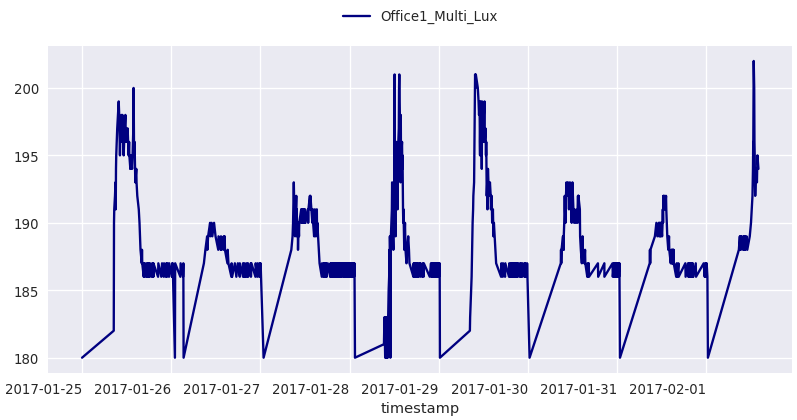

In [80]:
print(df.columns)
print(df.describe(include='all'))

#from scipy import stats

#cont = pd.crosstab(df.item, df.realName)

print(df.item.value_counts())
display(df)